### $\color{royalblue}{\text{ Nulta vježba iz numeričkih metoda u astronomiji (NMA), datum: 10.10.2024.}} $

### 0.1 Studenti treba da instaliraju $\textit{anacondu}$.
### 0.2 Studenti treba da naprave novo okruženje na sopstvenim mašinama.

### $\color{orange}{\text{Kratak UVOD u python i osnovne operacije povezane sa astronomijom.}} $

### $\color{magenta}{\text{1. Kreiranje i čuvanje fajla sa podacima.}}$

In [1]:
import numpy as np

# Kreiramo jednostavan 2D niz podataka (npr. magnitude zvijezda u različitim filterima)
# Generišemo slučajne apsolutne magnitude, a zatim izračunavamo prividne magnitude na osnovu distance

broj_zvijezda = 50
ID = np.arange(1, broj_zvijezda + 1)  # ID zvijezda
distance = np.random.uniform(10, 1000, broj_zvijezda)  # Distance u parsecima

# Generisanje slučajnih apsolutnih magnituda (M) za U, B, V filtere

abs_magnituda_U = np.random.uniform(-5, 5, broj_zvijezda)  # Apsolutna magnituda u U filteru
abs_magnituda_B = np.random.uniform(-5, 5, broj_zvijezda)  # Apsolutna magnituda u B filteru
abs_magnituda_V = np.random.uniform(-5, 5, broj_zvijezda)  # Apsolutna magnituda u V filteru

# Prividna magnituda (m)

magnituda_U = abs_magnituda_U + 5 * np.log10(distance) - 5
magnituda_B = abs_magnituda_B + 5 * np.log10(distance) - 5
magnituda_V = abs_magnituda_V + 5 * np.log10(distance) - 5

podaci = np.column_stack((ID, distance, magnituda_U, magnituda_B, magnituda_V))

# Čuvamo podatke u CSV fajlu

np.savetxt('magnitude_zvijezda.csv', podaci, delimiter=',', header='ID,Distance,U,B,V',
           comments='', fmt='%.1f')

print('Podaci za 50 zvijezda su sačuvani u fajlu magnitude_zvijezda.csv')

Podaci za 50 zvijezda su sačuvani u fajlu magnitude_zvijezda.csv


### Formula za magnitude korišćena u prethodnom dijelu je: $m = M + 5 \cdot \log_{10}(d_{pc}) - 5$.
### Što se tiče numpy.random.uniform, raspodjela vjerovatnoće je: $p(x)=\frac{1}{b-a}$, gdje su 
### a i b granice izabranog intervala.

### $\color{magenta}{\text{2. Učitavanje podataka iz gorepomenutog fajla.}}$

In [3]:
# Učitavamo podatke iz CSV fajla

ucitani_podaci = np.loadtxt('magnitude_zvijezda.csv', delimiter=',', skiprows=1)

# Prikazujemo učitane podatke
print("Učitani podaci iz fajla 'magnitude_zvijezda.csv':")
print(ucitani_podaci)

Učitani podaci iz fajla 'magnitude_zvijezda.csv':
[[ 1.000e+00  1.258e+02  3.300e+00  7.100e+00  6.000e+00]
 [ 2.000e+00  4.390e+01  8.000e+00  6.500e+00  6.800e+00]
 [ 3.000e+00  5.481e+02  1.160e+01  4.600e+00  7.900e+00]
 [ 4.000e+00  6.503e+02  4.800e+00  6.600e+00  1.140e+01]
 [ 5.000e+00  1.134e+02  5.800e+00  3.900e+00  7.900e+00]
 [ 6.000e+00  1.464e+02  8.500e+00  1.000e+00  3.300e+00]
 [ 7.000e+00  4.474e+02  1.090e+01  5.600e+00  9.000e+00]
 [ 8.000e+00  4.327e+02  7.200e+00  9.000e+00  1.230e+01]
 [ 9.000e+00  7.734e+02  8.400e+00  1.180e+01  1.090e+01]
 [ 1.000e+01  5.987e+02  4.300e+00  6.900e+00  7.600e+00]
 [ 1.100e+01  4.952e+02  5.800e+00  5.100e+00  1.060e+01]
 [ 1.200e+01  5.759e+02  1.110e+01  1.190e+01  4.400e+00]
 [ 1.300e+01  4.350e+01  2.200e+00  6.300e+00 -4.000e-01]
 [ 1.400e+01  6.742e+02  1.060e+01  7.100e+00  1.240e+01]
 [ 1.500e+01  3.113e+02  1.060e+01  9.100e+00  4.900e+00]
 [ 1.600e+01  4.560e+01  6.300e+00  5.500e+00  7.000e+00]
 [ 1.700e+01  1.320e+0

### $\color{magenta}{\text{3. Plotovanje podataka i neke pojedinosti grafičkog prikaza.}}$

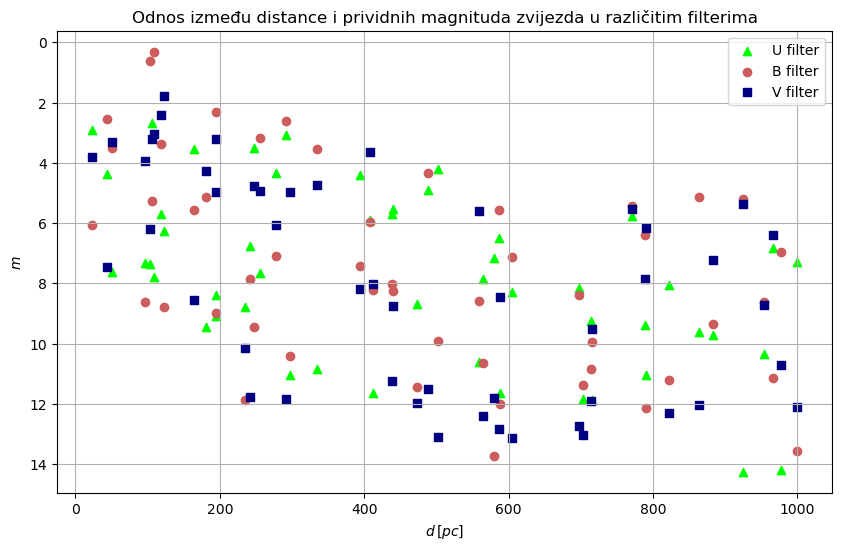

In [8]:
import matplotlib.pyplot as plt

# Plotovanje odnosa distance i magnituda

plt.figure(figsize=(10, 6))
plt.scatter(distance, magnituda_U, label='U filter', color='lime', marker='^')
plt.scatter(distance, magnituda_B, label='B filter', color='indianred', marker='o')
plt.scatter(distance, magnituda_V, label='V filter', color='navy', marker='s')

# Dodajemo naslove, labele, legendu...

plt.title('Odnos između distance i prividnih magnituda zvijezda u različitim filterima')
plt.xlabel(r'$d\,[pc]$')
plt.ylabel(r'$m$')
plt.gca().invert_yaxis()  # Inverzna skala za magnitude
plt.legend()
plt.grid(True)
plt.show()

### $\color{magenta}{\text{4. Pristup određenim podacima iz našeg primjera.}}$

In [5]:
print(ucitani_podaci[1, :])  # sve informacije o drugoj zvijezdi

[ 2.  43.9  8.   6.5  6.8]


In [6]:
print(ucitani_podaci[4, 3]) # B magnituda pete zvijezde

3.9


In [20]:
print(ucitani_podaci[:5, :]) # podaci za prvih pet zvijezda

[[  1.  125.8   3.3   7.1   6. ]
 [  2.   43.9   8.    6.5   6.8]
 [  3.  548.1  11.6   4.6   7.9]
 [  4.  650.3   4.8   6.6  11.4]
 [  5.  113.4   5.8   3.9   7.9]]


### $\color{orange}{\text{Nizovi u pythonu - uopštenje.}} $

### Evo primjera za neki 2D niz.

In [3]:
# Podaci za asteroide: prečnik [km], udaljenost od Sunca [AU], brzina [km/s]

precnici = np.random.uniform(1, 100, 5)  # 5 asteroida sa prečnicima između 1 i 100 km
udaljenosti = np.random.uniform(0.5, 5, 5)  # Udaljenosti između 0.5 i 5 AU
brzine = np.random.uniform(5, 30, 5)  # Brzine između 5 i 30 km/s

# Kreiramo 2D niz gdje svaki red sadrži podatke o jednom asteroidu

asteroidi_2d = np.column_stack((precnici, udaljenosti, brzine))

print('Dimenzije su:', asteroidi_2d.shape)
print('2D niz - podaci o asteroidima (prečnik, udaljenost, brzina):')
print(asteroidi_2d)

Dimenzije su: (5, 3)
2D niz - podaci o asteroidima (prečnik, udaljenost, brzina):
[[73.93298431  0.8991469  25.19842374]
 [13.28311163  1.45404089 11.79379112]
 [28.05976758  3.42882045 21.35877606]
 [36.19709545  2.27613352 24.02121396]
 [78.60090552  3.36049256 20.70416568]]


### Prelazimo na 3D niz...

In [5]:
# Podaci za asteroide: prečnik, udaljenost, brzina za određene vremenske trenutke

# 5 asteroida, posmatranih u 3 vremenska trenutka

broj_asteroida = 5
vremenski_trenutak = 4

# Nasumični podaci za svaki vrmemenski trenutak (prečnici, udaljenosti, brzine)

precnici = np.random.uniform(1, 100, (vremenski_trenutak, broj_asteroida))
udaljenosti = np.random.uniform(0.5, 5, (vremenski_trenutak, broj_asteroida))
brzine = np.random.uniform(5, 30, (vremenski_trenutak, broj_asteroida))

# 3D niz: Svaki vremenski trenutak sadrži 2D podatke o asteroidima (prečnik, udaljenost, brzina)

asteroidi_3d = np.stack((precnici, udaljenosti, brzine), axis=2)

print("3D niz - podaci o asteroidima tokom 4 vremenska trenutka:")
print(asteroidi_3d)

3D niz - podaci o asteroidima tokom 4 vremenska trenutka:
[[[52.42356114  0.75821837 24.78731727]
  [32.71833277  2.88642763 11.89313664]
  [36.84716018  4.71702083 15.65588632]
  [12.36730104  4.59034036  6.46182843]
  [33.05423508  4.19870551  9.9976118 ]]

 [[97.28002866  0.65349919  9.82727606]
  [12.46518089  2.48080527 18.76173899]
  [63.71553579  3.65151862 24.2970136 ]
  [94.69340013  1.09933193 22.88317626]
  [13.63864133  0.74870019 24.19728389]]

 [[31.76859649  2.81449929 12.02175247]
  [20.50265657  4.91442861  9.80093307]
  [12.57591032  3.41510807 25.59334929]
  [17.80525561  2.70729768  8.99131469]
  [38.33961643  1.01108136  7.84555713]]

 [[37.0169141   4.39268573 26.15823837]
  [49.27845689  2.92297462 26.0543479 ]
  [90.13907404  2.59574865 18.61574569]
  [20.53508394  1.77752683  5.86700766]
  [76.85044684  0.85743487 20.99213848]]]


### Provjera dimenzije niza.

In [6]:
print(asteroidi_3d.shape)

(4, 5, 3)


### Primjer: plotujemo brzine za svih pet asteroida u drugom vremenskom trenutku.

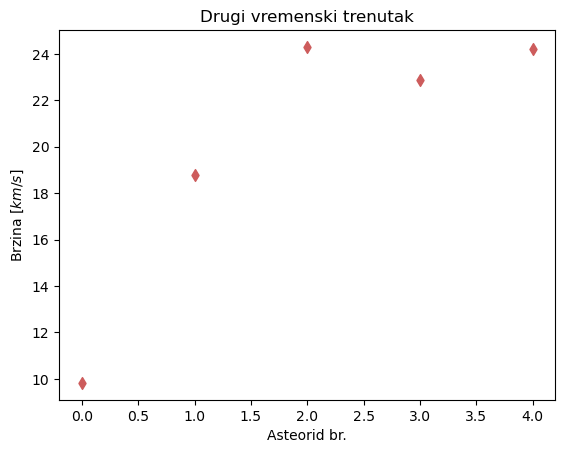

In [9]:
plt.scatter(range(asteroidi_3d.shape[1]), asteroidi_3d[1, :, 2], marker='d', color='indianred')
plt.xlabel('Asteorid br.')
plt.ylabel(r'Brzina $[km/s]$')
plt.title('Drugi vremenski trenutak')
plt.grid(False)
plt.show()

### $\color{green}{\text{ZADACI:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 1. Napraviti numerički niz od 1 do 100 sa korakom 0.1.
<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 2. Napraviti numerički niz od 1 do 100 (bez 100) sa 700 elemenata.
<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 3. U monotono rastućem nizu pronaći sve elemente koji su veći od neke vrijednosti $a_1$  i manji od nekog $a_2$.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 4. U fajlu Atens.dat pronaći sve asteroide čija je velika poluosa između $0.8$ i $0.9$ $AJ$ i/ili ekscentričnost orbite
#### između $0.2$ i $0.3$.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

### $\color{green}{\text{RJEŠENJA:}} $

### 1. zadatak - rješenje:

In [12]:
niz1 = np.arange(1, 100.1, 0.1)  # Početak je 1, kraj je 100.1 (kako bi uključili 100), korak je 0.1
print(len(niz1))

991


### 2. zadatak - rješenje:

In [13]:
niz2 = np.linspace(1, 100, 700, endpoint=False)  # endpoint=False isključuje krajnju vrijednost 100
print(len(niz2))

700


### 3. zadatak - rješenje:

In [14]:
# Kreiramo monotono rastući niz

monotoni_niz = np.arange(1, 101)  # Niz od 1 do 100

# Definišemo granice

a1 = 30
a2 = 70

# Pronađemo sve elemente koji su veći od a1 i manji od a2

selektovani_elementi = monotoni_niz[(monotoni_niz > a1) & (monotoni_niz < a2)]
print(selektovani_elementi)

[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


### 4. zadatak - rješenje:

In [18]:
import pandas as pd # korisno za manipulisanje podacima

a_min = 0.8
a_max = 0.9
e_min = 0.2
e_max = 0.3

asteroidi = pd.read_csv('Atens.dat', delim_whitespace=True)

# uslov a)

asteroidi_1 = asteroidi[(asteroidi['a'] > a_min) & 
                        (asteroidi['a'] < a_max) & (asteroidi['e'] > e_min)
                        & (asteroidi['e'] < e_max)] # uslov a)

# uslov b)

asteroidi_2 = asteroidi[(asteroidi['a'] > a_min) & 
                        (asteroidi['a'] < a_max) | (asteroidi['e'] > e_min)
                        & (asteroidi['e'] < e_max)] # uslov b)

# Prikazivanje rezultata
print('Ukupan broj asteroida je:', len(asteroidi))
print('Broj asteroida čija je velika poluosa između 0.8 i 0.9 AU i/ili ekscentricitet između 0.2 i 0.3:')
print('a)', len(asteroidi_1),'b)', len(asteroidi_2))

Ukupan broj asteroida je: 684
Broj asteroida čija je velika poluosa između 0.8 i 0.9 AU i/ili ekscentricitet između 0.2 i 0.3:
a) 79 b) 309
